## Autonomous Vehicle (AV) Safety Analysis



In [90]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

**Import the data into Jupyter Notebook**

In [91]:
disengagements = pd.read_csv('mp1_av_disengagements.csv')
totalmiles = pd.read_csv('mp1_av_totalmiles.csv')

In [92]:
disengagements.head()

,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


In [93]:
totalmiles.head()

,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements
0,14-Sep,WDD2221851A001072,4207,44,24,20
1,14-Oct,WDD2221851A001072,23971,228,100,128
2,14-Nov,WDD2221851A001072,15837,141,66,75
3,14-Dec,WDD2221851A001072,9413,36,15,21
4,15-Jan,WDD2221851A001072,18192,48,18,30


## Descriptive Analysis and Data Exploration


**Summarizing the following information**

  **Total number of AV disengagements over the entire duration of available data**

 

In [94]:
len(disengagements) #a. Total number of AV disengagements over the entire duration of available data

1024

**Number of unique months that have recorded AV disengagements**

In [95]:
disengagements.Month.nunique() #b. Number of unique months that have recorded AV disengagements

15

**List of unique locations of AV disengagements**

In [96]:
disengagements.Location.unique() #c. List of unique locations of AV disengagements

array(['urban-street', 'highway'], dtype=object)

**Number of unique causes for AV disengagements**

In [97]:
disengagements.Cause.nunique() #d. Number of unique causes for AV disengagements

10

**Number of missing values (NAs commonly occur in real world datasets)**

In [98]:
disengagements.isnull().sum() #e. Number of missing values (NAs commonly occur in real world datasets)

Month              0
Car                0
Location           0
Weather            0
TypeOfTrigger      0
ReactionTime     532
Cause              0
dtype: int64

In [99]:
totalmiles.isnull().sum() #e. Number of missing values (NAs commonly occur in real world datasets)

Month                                 0
Car                                   0
miles driven in autonomous mode       0
total number of disengagements        0
number of automatic disengagements    0
number of manual disengagements       0
dtype: int64

**Plotting a pie chart for the causes of AV disengagement**

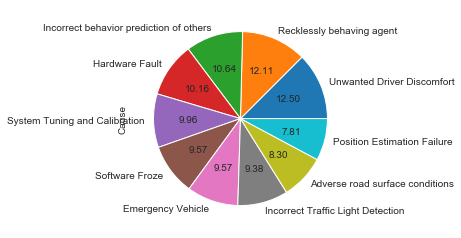

In [100]:
disengagements["Cause"].value_counts().plot.pie(autopct='%.2f')
plt.rcParams["figure.figsize"] = 10,10

**Based on the above plot the two top causes of disengagements are 'Unwanted Driver Discomfort' and 'Recklessly Behaving Agent'.** We verify the same below:

In [101]:
disengagements["Cause"].value_counts()

Unwanted Driver Discomfort                 128
Recklessly behaving agent                  124
Incorrect behavior prediction of others    109
Hardware Fault                             104
System Tuning and Calibration              102
Software Froze                              98
Emergency Vehicle                           98
Incorrect Traffic Light Detection           96
Adverse road surface conditions             85
Position Estimation Failure                 80
Name: Cause, dtype: int64

**Visualizing the trend of disengagement/mile over time with monthly granularity**

In [102]:
#adding a column for disengagements/mile
totalmiles["Disengagements/Mile"] = totalmiles["total number of disengagements"] / totalmiles["miles driven in autonomous mode"]

In [103]:
totalmiles["Month"].unique()

array(['14-Sep', '14-Oct', '14-Nov', '14-Dec', '15-Jan', '15-Feb',
       '15-Mar', '15-Apr', '15-May', '15-Jun', '15-Jul', '15-Aug',
       '15-Sep', '15-Oct', '15-Nov'], dtype=object)

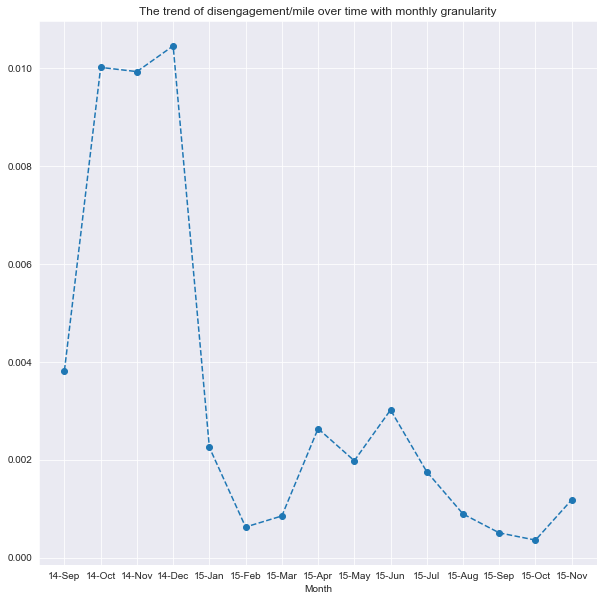

In [104]:
totalmiles.groupby("Month")["Disengagements/Mile"].sum().plot(marker='o', ls='--')

bars = totalmiles["Month"].unique()
y_pos = np.arange(len(bars))

plt.rcParams["figure.figsize"] = 12,10
plt.title("The trend of disengagement/mile over time with monthly granularity")
plt.xticks(y_pos,bars)
plt.show()

The above graph shows a decremental trend over time. **Therefore the AVs show signs of maturity over time.**

## **Basic Analysis of AV Disengagements**<br>
In this task, we will be fitting probability distributions to the data and interpreting the distributions. I will also do some inferential analysis of the distribution providing us with insights about the data.



In [105]:
disengagements.dropna(inplace=True) #removing NA values
reaction_wo_outliers = disengagements[disengagements.ReactionTime < 10]

/Users/nihithindlekar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


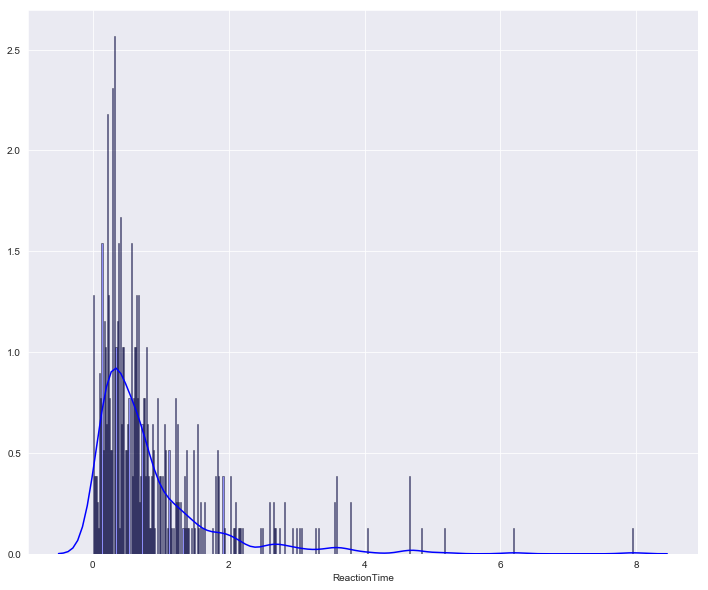

In [106]:
import seaborn as sns
sns.distplot(reaction_wo_outliers['ReactionTime'], hist=True, kde=True, 
             bins=500, color = 'blue',
             hist_kws={'edgecolor':'black'})

The distribution closely resembles **Weibull distribution**. It is highly intuitive to assume that the reaction time must be some generalized form of the exponential distribution, as after any disengagement, at every moment either the driver takes over the contol (hits) or does not take over the control (misses). As there must be a lower bound for any human to react to an incident, we see an initial dip. So the Weibull distribution, which is a generalized exponential distribution, best fits the actual distribution.

**Computing the average reaction time**

  **a. For the entire duration of the dataset**

  **b. For the entire duration of the dataset differentiated by the location of
disengagement**

In [107]:
disengagements['ReactionTime'].mean()

0.9297703252032526

In [108]:
disengagements.groupby('Location')["ReactionTime"].mean()

Location
highway         1.48000
urban-street    0.92865
Name: ReactionTime, dtype: float64

**As known that the mean reaction time for humans in non-AV cars is 1.09 seconds [4].**

In [109]:
from scipy import stats

In [110]:
stats.ttest_1samp(a=np.array(disengagements['ReactionTime']),popmean=1.09)


Ttest_1sampResult(statistic=-2.0986037086235854, pvalue=0.03636206696694606)

As the p-value is less than 0.05, we reject the null hypothesis and conclude that the two means are significantly different.


**5. Plot the probability distribution of disengagements/mile with monthly granularity.**

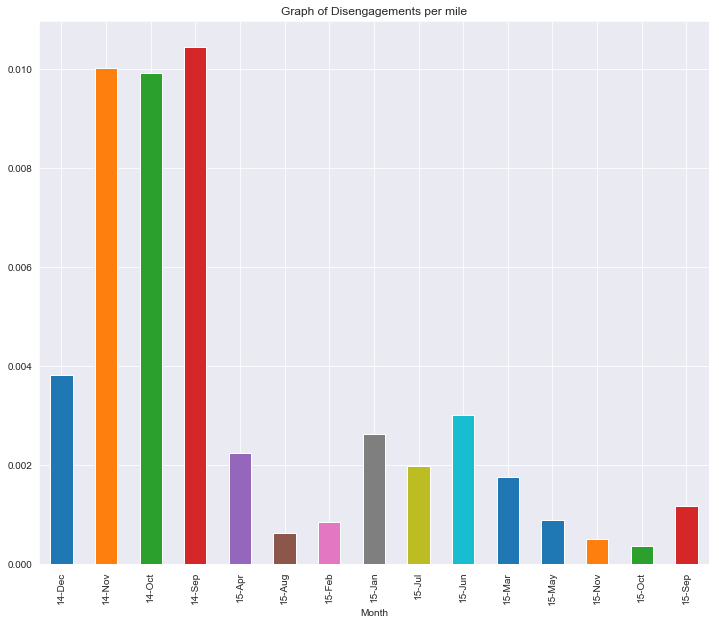

In [111]:
#apply groupby function to plot graph of disengagements/mile with monthly granularity
totalmiles.groupby("Month")["Disengagements/Mile"].sum().plot(kind='bar')
plt.title("Graph of Disengagements per mile")
plt.rcParams["figure.figsize"] = 12,10
plt.show()

As we can see from above graph, the probability distribution for disengagements/mile with monthly granularity does not fit either of the given three distributions(Gaussian, Weibull, Exponential). But the distribution as seen above, contains two distinct humps or peaks with a valley separating them.  Each peak is a local maximum since they represent the highest values relative to the data points immediately surrounding them. The valley between these peaks is called a local minimum. And such kind of distribution with two peaks is generally called a **Bimodal distribution**.

## **Probabilistic Analysis of AV Disengagement**


In [112]:
TD = totalmiles["total number of disengagements"].sum()
print(TD)

1024


In [113]:
TM = totalmiles["miles driven in autonomous mode"].sum()
print(TM)

505229


In [114]:
disengagements["Weather"].value_counts()

cloudy    396
clear      96
Name: Weather, dtype: int64

In [115]:
TD_Cd = 835 #Total disengagements on cloudy days
TD_Cl = 189 #Total disengagements on clear days

#Total miles driven under cloudy condition
TM_Cd = float(0.28*505229) #Since it is equally likely for the AV to drive on a clear day and a cloudy day.
print(TM_Cd)
#Total miles driven under clear condition
TM_Cl = float(0.72*505229) #Since it is equally likely for the AV to drive on a clear day and a cloudy day.
print(TM_Cl)

141464.12000000002
363764.88


In [116]:
lambda1 = TD_Cd / TM_Cd  #Probability of disengagement per mile on a cloudy day
print(lambda1)

0.005902556775527249


**Based on the above assumptions, I calculated the probability of disengagement per mile on a clear day.**

In [117]:
lambda2 = TD_Cl / TM_Cl #Probability of disengagement per mile on a cloudy day
print(lambda2)

0.0005195663748517998


**Similarly, I calculated the probability of an automatic disengagement per mile on a cloudy day, and the probability of an automatic disengagement per mile on a clear day.**

I denote the probability of automatic disengagement per mile on a cloudy day, which is **$P(AutoDis | Cloudy)$**,  as **P__Auto_Dis_per_Mile__Cd**.

In [118]:
disengagements.groupby("Weather")["TypeOfTrigger"].value_counts()

Weather  TypeOfTrigger
clear    automatic         96
cloudy   automatic        395
         manual             1
Name: TypeOfTrigger, dtype: int64

In [119]:
TD_Cd_Auto = 397 #Total automatic disengagements on cloudy days
P__Auto_Dis_per_Mile__Cd = TD_Cd_Auto / TM_Cd #Probability of automatic diengagement per mile on cloudy days
print(P__Auto_Dis_per_Mile__Cd)

0.0028063653172267283


I denote the probability of automatic disengagement per mile on a cloudy day, which is **$P(AutoDis | Clear)$**,  as **P__Auto_Dis_per_Mile__Cl**.

In [120]:
TD_Cl_Auto = 96 #Total automatic disengagements on clear days
P__Auto_Dis_per_Mile__Cl = TD_Cl_Auto / TM_Cl #Probability of automatic diengagement per mile on clear days
print(P__Auto_Dis_per_Mile__Cl)

0.00026390673008345393


**Checking how likely is it that in 10000 miles, there are 150 or more disengagements under cloudy conditions**

Repeated Bernoulli trials generates Binomial distribution. However, when the interval between which an event can either occur or not is extremely small, we may treat the distribution as a Poisson distribution. In this case we have 10,000 miles and each interval is 1 mile. Therefore we can treat this distribution as a continuous poisson distribution with $\mu$ as $\lambda_1 * 1000$. We then find out $1-cdf(150)$ to get the result.

In [121]:
mu = lambda1 * 10000

In [122]:
from scipy.stats import poisson

In [123]:
poisson.sf(150, mu)

1.1724079666387172e-23

**As the probability is almost zero, it is highly unlikely that more than 150 disengagements take place in 10000 miles.**

**At the 0.05 significance level, we will be testing the following hypothesis:
The AV has more disengagements (automatic and manual) on cloudy days than clear days.**

We compare the rates, $\lambda_1$ (cloudy) and $\lambda_2$ (clear) of the two Poisson distributions, using the following z-score:

$(\lambda_1 - \lambda_2)/\sqrt(\lambda_1/N_1+\lambda_2/N_2)$

In [124]:
z_score=(lambda1-lambda2)/((lambda1/TM_Cd + lambda2/TM_Cl)**(0.5))
print(z_score)

25.913005165877937


In [125]:
import scipy as sp
p_value = sp.stats.norm.sf(abs(z_score))
p_value

2.376213273440993e-148

**As the p-value of this test is much less than 0.05, it can be concluded that the rates are diffent. Therefore, AVs are more prone to disengagements on cloudy days.**

**Next, I found the following conditional probabilities based on our assumptions:**



I intend to find **$P(Reaction>0.5 | AutoDis , Cloudy)$** which we call **Acci_Cd**

In [126]:
disengagements.dropna(inplace=True) #Dropping all null values

In [127]:
disengagements.groupby("Weather")["ReactionTime"].count()

Weather
clear      96
cloudy    396
Name: ReactionTime, dtype: int64

In [128]:
cloudydf = disengagements[disengagements["ReactionTime"]>0.5]

In [129]:
cloudydf.groupby("Weather")["ReactionTime"].count()

Weather
clear      53
cloudy    215
Name: ReactionTime, dtype: int64

In [130]:
Acci_Cd = 215/396 #Conditional probability of high reaction time on a cloudy day
print(Acci_Cd)

0.5429292929292929




I intend to find **$P(Reaction>0.7 | AutoDis , Clear)$** which we call **Acci_Cl**

In [131]:
cleardf = disengagements[disengagements["ReactionTime"]>0.7]

In [132]:
cleardf.groupby("Weather")["ReactionTime"].count()

Weather
clear      37
cloudy    154
Name: ReactionTime, dtype: int64

In [133]:
Acci_Cl = 37/96 #Conditional probability of high reaction time on a cloudy day
print(Acci_Cl)

0.3854166666666667


**A study found that anautomatic AV disengagement will result in an accident if the human driver is slow in reacting. Following reactions are considered slow: (i) a reaction time greater than 0.5s under cloudy conditions and, (ii) a reaction time greater than 0.7s under clear conditions. 
We will find the probability of an accident per mile involving an AV disengagement.**


The task here is to find $P(Accident)$. We perform the below manipulations based on the total probability theorem:

**$P(Accident)$ = **

**$P(Accident | Cloudy)P(Cloudy) + P(Accident | Clear)P(Clear)$**

**= $P(Reaction>0.5 , AutoDis | Cloudy)P(Cloudy) + P(Reaction>0.7 , AutoDis | Clear)P(Clear)$**


**= $P(Reaction>0.5| AutoDis , Cloudy)P(AutoDis | Cloudy)P(Cloudy) + P(Reaction>0.7 | AutoDis , Clear)P(AutoDis | Clear)P(Clear)$**

We have all the values as shown below:

$P(Reaction>0.5| AutoDis , Cloudy)$ = Acci_Cd

$P(AutoDis | Cloudy)$ = P__Auto_Dis_per_Mile__Cd

$P(Cloudy)$ = 0.28

$P(Reaction>0.7 | AutoDis , Clear)$ = Acci_Cl

$P(AutoDis | Clear)$ = P__Auto_Dis_per_Mile__Cl

$P(Clear)$ = 0.72

In [134]:
P_Acci_per_mile = Acci_Cd * P__Auto_Dis_per_Mile__Cd * 0.28 + Acci_Cl * P__Auto_Dis_per_Mile__Cl * 0.72
print(P_Acci_per_mile)

0.000499858340065454


**The probability of a human driver causing a car accident is $2x10^{-6}$ [4].<br>
Comparing AVs to human drivers.**


Probability of accident per mile for AVs is approximately $4.99*10^{-4}$ and that of human beings is $2x10^{-6}$. So, we see that the ratio is of the order $10^2$, which is too high to be concluded as being same.

We also perform a z-test with significance level 0.05 just to cross-verify:

In [135]:
lambda11=P_Acci_per_mile   #AV accident rate
lambda22=0.000002  #Human accident rate
z_score1=(lambda11-lambda22)/((lambda11/505229 + lambda22/505229)**(0.5))
print(z_score1)

15.796444623859077


In [136]:
p_value1 = sp.stats.norm.sf(abs(z_score1))
print(p_value1)

1.6458257175571963e-56


**Therefore, it can be concluded that at this point of time AVs are much more prone to accidents than human drivers.**

## **Model Building and Evaluation**


In [137]:
unique=disengagements["Cause"].unique()

In [138]:
#Grouping causes into 3 different classes

dictOfWords = { i : unique[i] for i in range(0, len(unique) ) }
dictOfWords

{0: 'Incorrect Traffic Light Detection',
 1: 'Adverse road surface conditions',
 2: 'Position Estimation Failure',
 3: 'Emergency Vehicle',
 4: 'Software Froze',
 5: 'Hardware Fault',
 6: 'Incorrect behavior prediction of others',
 7: 'Recklessly behaving agent',
 8: 'System Tuning and Calibration',
 9: 'Unwanted Driver Discomfort'}

In [139]:
disengagements = disengagements.reset_index()
disengagements['Class'] = np.nan

In [140]:
disengagements.head()

,index,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause,Class
0,0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection,NaN
1,1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions,NaN
2,2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure,NaN
3,3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle,NaN
4,4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions,NaN


In [141]:
#Adding actual values in the newly created field "Class"
i=0
while i < len(disengagements["Cause"]):
    if (disengagements["Cause"][i] == dictOfWords[9] or disengagements["Cause"][i]== dictOfWords[7] or disengagements["Cause"][i] == dictOfWords[6]):
        disengagements["Class"][i]="Controller"
    elif (disengagements["Cause"][i] == dictOfWords[1] or disengagements["Cause"][i]== dictOfWords[3] or disengagements["Cause"][i]==dictOfWords[2] or disengagements["Cause"][i]==dictOfWords[0]):
        disengagements["Class"][i]="Perception System"
    else:
        disengagements["Class"][i]="Computer System"
    i += 1

/Users/nihithindlekar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/nihithindlekar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/nihithindlekar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/nihit

In [142]:
#Adding actual values in the newly created field "Class"
i=0
while i < len(disengagements["Cause"]):
    if (disengagements["Cause"][i] == dictOfWords[9] or disengagements["Cause"][i]== dictOfWords[7] or disengagements["Cause"][i] == dictOfWords[6]):
        disengagements["Class"][i]="Controller"
    elif (disengagements["Cause"][i] == dictOfWords[1] or disengagements["Cause"][i]== dictOfWords[3] or disengagements["Cause"][i]==dictOfWords[2] or disengagements["Cause"][i]==dictOfWords[0]):
        disengagements["Class"][i]="Perception System"
    else:
        disengagements["Class"][i]="Computer System"
    i += 1

/Users/nihithindlekar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/nihithindlekar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/nihithindlekar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [143]:
disengagements[:20]

,index,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause,Class
0,0,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection,Perception System
1,1,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions,Perception System
2,2,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure,Perception System
3,3,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle,Perception System
4,4,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions,Perception System
5,5,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.88,Incorrect Traffic Light Detection,Perception System
6,6,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.41,Emergency Vehicle,Perception System
7,7,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,1.45,Emergency Vehicle,Perception System
8,8,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.07,Software Froze,Computer System
9,9,14-Sep,WDD2221851A001072,urban-street,cloudy,automatic,0.37,Hardware Fault,Computer System


In [144]:
y = disengagements["Class"]

In [145]:
X = disengagements[["Location","Weather","TypeOfTrigger"]]

In [146]:
#Splitting entire data into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [147]:
#Recreating indexes for training and test data
X_train = X_train.reset_index()
X_train = X_train.drop("index", axis=1)
X_train.head()

,Location,Weather,TypeOfTrigger
0,urban-street,cloudy,automatic
1,urban-street,cloudy,automatic
2,urban-street,cloudy,automatic
3,urban-street,cloudy,automatic
4,urban-street,clear,automatic


In [148]:
y_train = y_train.reset_index()
y_train = y_train.drop("index", axis=1)
y_train.head()

,Class
0,Perception System
1,Controller
2,Computer System
3,Perception System
4,Computer System


In [149]:
X_test = X_test.reset_index()
X_test = X_test.drop("index", axis=1)
X_test.head()

,Location,Weather,TypeOfTrigger
0,urban-street,cloudy,automatic
1,urban-street,cloudy,automatic
2,urban-street,cloudy,automatic
3,urban-street,cloudy,automatic
4,urban-street,clear,automatic


In [150]:
y_test = y_test.reset_index()
y_test = y_test.drop("index", axis=1)
y_test.head()

,Class
0,Perception System
1,Perception System
2,Perception System
3,Controller
4,Computer System


Training: Based on the training data, we create a NB model to identify the cause of disengagement based on the features ‘Location’, ‘Weather’, and ‘TypeOfTrigger’.

Below we create a function which takes 4 input values:

-Training features

-Training labels

-Test features

-Test labels

It then applyes Naive Bayes classification to generate prediction values and stores them in an array y_hat.
Next, it compares y_hat values with the actual labels - 'Test labels', and counts the misclassifications.
Ultimately this function returns the accuracy (accuracy = 1 - (count_misclassification / length of Test Labels)).

In [151]:
def naive_bayes(features_train, labels_train, features_test, labels_test):
    length1 = len(features_test["Location"])
    length2 = len(features_train["Location"])
    y_hat = []
    i = 0
    while i < length1:
        j = 0
        count_joint_controller = 0
        count_joint_CS = 0
        count_joint_PS = 0
        count_location = 0
        count_weather = 0
        count_tot = 0
        while j < length2:
            if labels_train["Class"][j]=="Controller" and features_train["Location"][j] == features_test["Location"][i] and features_train["Weather"][j] == features_test["Weather"][i] and features_train["TypeOfTrigger"][j] == features_test["TypeOfTrigger"][i]:
                count_joint_controller += 1
        
            if labels_train["Class"][j]=="Computer System" and features_train["Location"][j] == features_test["Location"][i] and features_train["Weather"][j] == features_test["Weather"][i] and features_train["TypeOfTrigger"][j] == features_test["TypeOfTrigger"][i]:
                count_joint_CS += 1
        
            if labels_train["Class"][j]=="Perception System" and features_train["Location"][j] == features_test["Location"][i] and features_train["Weather"][j] == features_test["Weather"][i] and features_train["TypeOfTrigger"][j] == features_test["TypeOfTrigger"][i]:
                count_joint_PS += 1
        
            if features_train["Location"][j] == features_test["Location"][i]:
                count_location += 1
        
            if features_train["Weather"][j] == features_test["Weather"][i]:
                count_weather += 1
        
            if features_train["TypeOfTrigger"][j] == features_test["TypeOfTrigger"][i]:
                count_tot += 1
            j += 1
    
        
        
        P_conditional_controller = (count_joint_controller/length2) / float((count_location/length2) * (count_weather/length2) * (count_tot/length2))
        P_conditional_CS = (count_joint_CS/length2) / float((count_location/length2) * (count_weather/length2) * (count_tot/length2))
        P_conditional_PS = (count_joint_PS/length2) / float((count_location/length2) * (count_weather/length2) * (count_tot/length2))
        if P_conditional_controller > P_conditional_CS and P_conditional_controller > P_conditional_PS:
            y_hat.append("Controller")
        elif P_conditional_CS > P_conditional_controller and P_conditional_CS > P_conditional_PS:
            y_hat.append("Computer System")
        else:
            y_hat.append("Perception System")
        i += 1
        
    count_misclassification = 0
    k=0
    while k < length1:
        if y_hat[k] != labels_test["Class"][k]:
            count_misclassification += 1
        k += 1
        
    accuracy = 1 - float(count_misclassification / length1)
    return(accuracy)

In [152]:
#We measure the training accuracy by passing X_train, y_train, X_train, y_train
train_accuracy = naive_bayes(X_train,y_train,X_train,y_train)

In [153]:
print(train_accuracy) #We get a training accuracy of 79.89%

0.7989821882951654


Testing: for a new disengagement sample, we use the trained model to predict the cause of the disengagement. Define accuracy of the model and report its value on the testing data.

We measure the accuracy of the model on the test data by passing X_train, y_train, X_test, y_test to our function (model):

In [154]:
test_accuracy = naive_bayes(X_train,y_train,X_test,y_test)
print(test_accuracy) #We get a test accuracy of 82.82%

0.8282828282828283


To get a better estimate of the model performance,I performed cross-validation.

In [155]:
cv_count = 0
test_accuracy_cumulative = 0
train_accuracy_cumulative = 0

#Looping for 5 times cross validation
while cv_count < 5:
    X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X, y, test_size=0.2)
    y_train_i = y_train_i.reset_index()
    y_train_i = y_train_i.drop("index", axis=1)
    X_train_i = X_train_i.reset_index()
    X_train_i = X_train_i.drop("index", axis=1)
    y_test_i = y_test_i.reset_index()
    y_test_i = y_test_i.drop("index", axis=1)
    X_test_i = X_test_i.reset_index()
    X_test_i = X_test_i.drop("index", axis=1)
    #Adding the accuracy for each test
    test_accuracy_cumulative = test_accuracy_cumulative + naive_bayes(X_train_i, y_train_i, X_test_i, y_test_i)
    cv_count += 1

#Averaging the accuracy over the 5 runs    
cv_accuracy = test_accuracy_cumulative/5.0

print(cv_accuracy)

0.8141414141414142


**We achieve a cross-validation accuracy of 81.41%**